In [ ]:
print('Hello, Do it 딥 러닝')

Hello, Do it 딥 러닝


In [ ]:
import numpy as np
print(np.__version__)

2.0.2


In [ ]:
my_arr=np.array([ [10,20,30], [40,50,60] ])
print(my_arr)
type(my_arr)

[[10 20 30]
 [40 50 60]]


numpy.ndarray

In [ ]:
print(my_arr[0][1])
print(np.sum(my_arr))

20
210


In [ ]:
import matplotlib.pyplot as plt


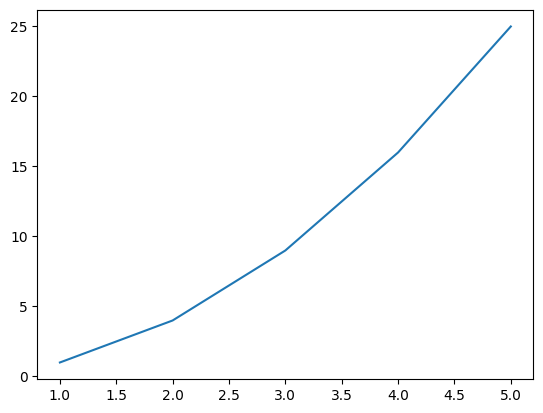

In [ ]:
plt.plot( [1,2,3,4,5], [1,4,9,16,25] )
plt.show()

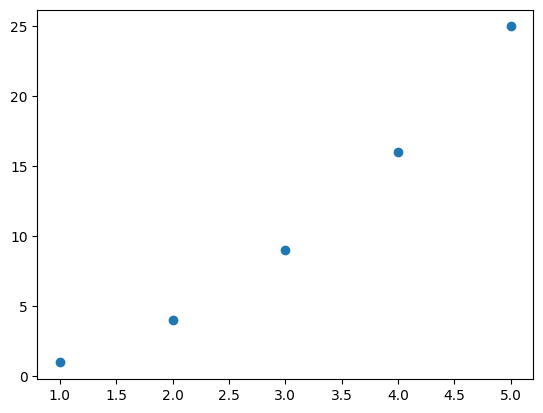

In [ ]:
plt.scatter( [1,2,3,4,5], [1,4,9,16,25] )
plt.show()

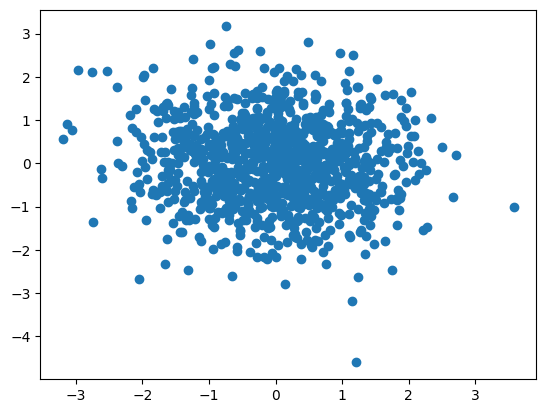

In [ ]:
x=np.random.randn(1000)
y=np.random.randn(1000)
plt.scatter(x,y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)
print(diabetes.data[0:3])
print(diabetes.target[:3])

(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]
[151.  75. 141.]


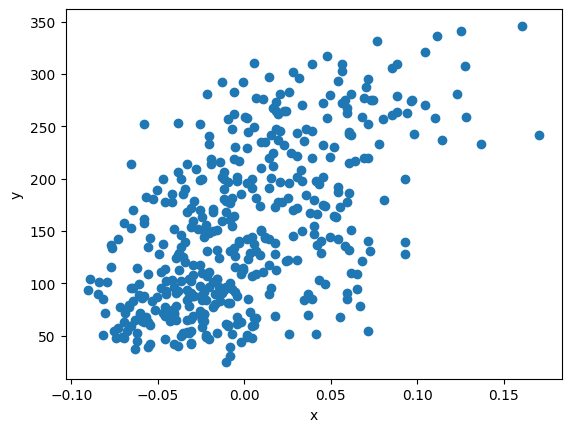

In [ ]:
x=diabetes.data[:,2] ; y=diabetes.target
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
w=1.0 #가중치 초기 설정
b=1.0 #절편 초기 설정

In [ ]:
#첫 번쨰 샘플 x[0]
y_hat=x[0]*w + b
print(y_hat)
print(y[0])

1.0616962065186832
151.0


In [ ]:
#가중치 업데이트-(1) 변화율을 더한다
w_inc=w+0.1
y_hat_inc=x[0]*w_inc + b
print(y_hat_inc)

w_rate=(y_hat_inc - y_hat) / (w_inc - w) #가중치 변화에 따른 예측치 변화율
print(w_rate)

w_new=w + w_rate
print(w_new)

1.0678658271705517
0.06169620651868429
1.0616962065186843


In [ ]:
b_inc=b + 0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b) #절편 변화에 따른 예측치 변화율
print(b_rate) # b_rate == 1

b_new = b + 1
print(b_new)

1.1616962065186833
1.0
2.0


In [ ]:
#가중치 업데이트-(2) (y-y_hat) * 변화율 을 더한다
err=y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print( w_new, b_new )

10.250624555903848 150.9383037934813


In [ ]:
#두 번쨰 샘플 x[1]
y_hat = x[1]*w_new + b_new
err=y[1] - y_hat
w_rate = x[1]
w_new= w_new + w_rate * err
b_new = b_new + 1 * err
print( w_new, b_new )

14.0171087593179 77.76583376162546


In [ ]:
#전체 샘플에 대하여 규칙(w, b) 찾는 과정 반복
for x_i, y_i in zip(x,y) :
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


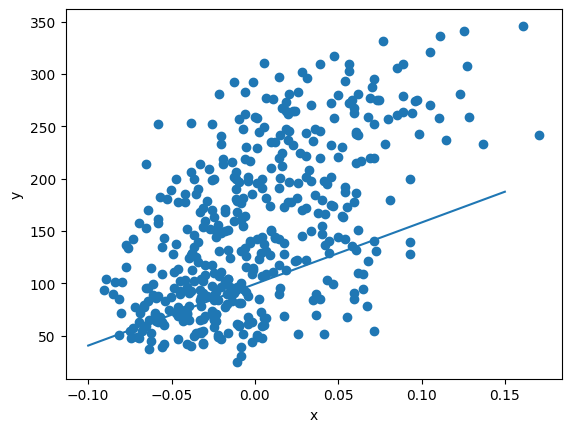

In [ ]:
#그래프 그려보기
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot( [pt1[0], pt2[0]], [pt1[1], pt2[1]] ) #??? pt1이 점 1개, pt2가 점 1개 아님?
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#여러 에포크 반복
for i in range(1,100) :
  for x_i, y_i in zip(x,y) :
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b) #모델 : y_hat = 913.6x + 123.4

913.5973364346786 123.39414383177173


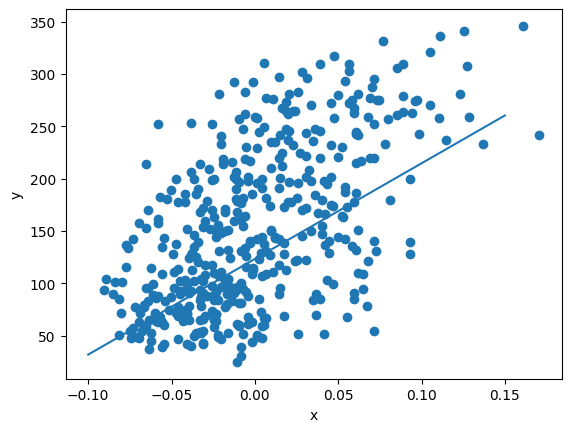

In [ ]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot( [pt1[0], pt2[0]], [pt1[1], pt2[1]] )
plt.xlabel('x')
plt.ylabel('y')
plt.show()

287.8416643900139


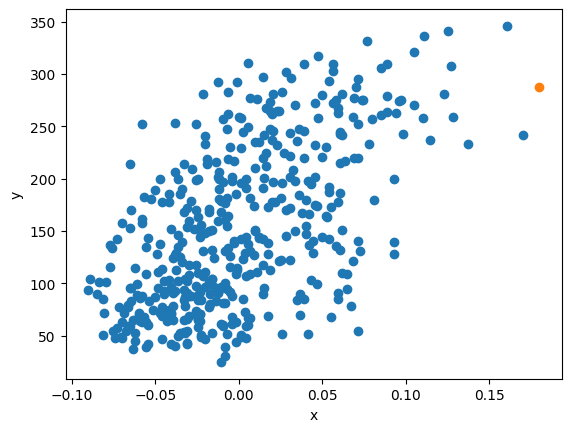

In [ ]:
#구한 모델을 토대로 예측하기
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

plt.scatter(x,y)
plt.scatter( x_new, y_pred )
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#경사하강법 알고리즘 -> 'Neuron' 클래스로 만들어보기
class Neuron :
  def __init__(self) :
    self.w = 1.0  #가중치 초기화
    self.b = 1.0  #절편 초기화

  def forpass(self, x) : #X는 입력 데이터
    y_hat = x * self.w + self.b #직선 방정식 계산
    return y_hat

  def backprop(self, x, err) : #역전파. err = 오차 -(y - y_hat)
    w_grad = x * err #가중치에 대한 변화율 계산
    b_grad = 1 * err #절편에 대한 변화율 계산
    return w_grad, b_grad

  def fit(self, x, y, epochs=100) :
    for i in range(epochs) : #에포크만큼 총 데이터 반복
      for x_i, y_i in zip(x,y) : #각각 샘플에 대하여 반복
        y_hat = self.forpass(x_i) #정방향 계산 (예상값 구하기)
        err = - (y_i - y_hat) #오차 계산 (실제 y와 예상값의 차)
        w_grad, b_grad = self.backprop(x_i, err) #역방향 계산(그레이디언트, 즉 변화율 구함)
        self.w -= w_grad #가중치 업데이트
        self.b -= b_grad #절편 업데이트

In [ ]:
#모델 훈련하기
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
x=diabetes.data[:,2] ; y=diabetes.target

neuron = Neuron()
neuron.fit(x,y)

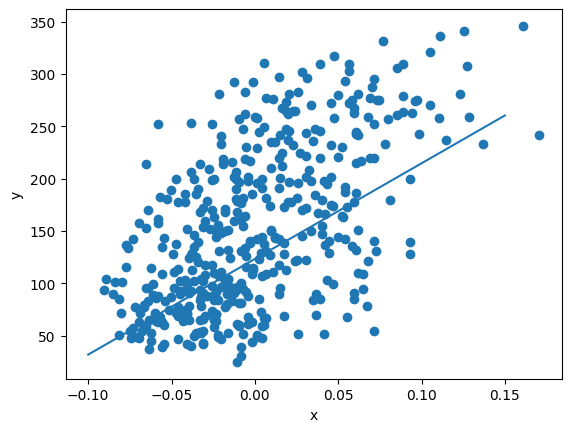

In [ ]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()